In [18]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
print("Done!")

Done!


In [12]:
#Read the world cup FIFA data set
df = pd.read_csv("datasets/WorldCupMatches.csv", index_col = 'Datetime', parse_dates = True)
# Display the first five rows
df.head()

,Stage,Stadium,City,H.Team Name,H.Team Goals,A.Team Goals,A.Team Name,Win conditions,Attendance,H.time H. Goals,H.time A. Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,H.Team I,A.Team I
Datetime,,,,,,,,,,,,,,,,,,
1930-07-13 15:00:00,Group A,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1930-07-13 15:00:00,Group D,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
1930-07-14 12:45:00,Group B,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
1930-07-14 14:50:00,Group C,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
1930-07-15 16:00:00,Group A,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [14]:
# Let's dive deep about Brazil
# First we analyse their Semi-finals
Arg_semfinal = df[(df['Stage'] == 'Semi-finals') & 
                  ((df['H.Team Name'] == 'Brazil') | (df['A.Team Name'] == 'Brazil'))].iloc[:, :9]
Arg_semfinal

,Stage,Stadium,City,H.Team Name,H.Team Goals,A.Team Goals,A.Team Name,Win conditions,Attendance
Datetime,,,,,,,,,
1938-06-16 18:00:00,Semi-finals,Stade V�lodrome,Marseilles,Italy,2,1,Brazil,,33000.0
1958-06-24 19:00:00,Semi-finals,Rasunda Stadium,Solna,Brazil,5,2,France,,27100.0
1962-06-13 14:30:00,Semi-finals,Nacional,Santiago De Chile,Brazil,4,2,Chile,,76594.0
1970-06-17 16:00:00,Semi-finals,Jalisco,Guadalajara,Brazil,3,1,Uruguay,,51261.0
1994-07-13 16:30:00,Semi-finals,Rose Bowl,Los Angeles,Sweden,0,1,Brazil,,91856.0
1998-07-07 21:00:00,Semi-finals,Stade V�lodrome,Marseilles,Brazil,1,1,Netherlands,Brazil win on penalties (4 - 2),54000.0
2002-06-26 20:30:00,Semi-finals,Saitama Stadium 2002,Saitama,Brazil,1,0,Turkey,,61058.0
2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0


In [27]:
# We creat an index column to specify years
df.index = pd.to_datetime(df.index)
df['Year'] = pd.DatetimeIndex(df.index).year

<AxesSubplot:title={'center':'World cup finals with thier Attendance number'}, xlabel='Year', ylabel='Attendance'>

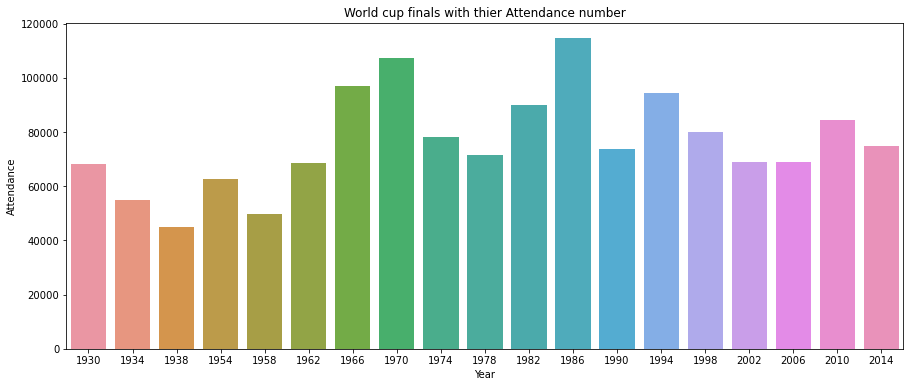

In [54]:
finals = df[df.Stage == 'Final']
#Compare all the worldcup finals with people attendance records
plt.figure(figsize = (15, 6))

# Giving the chart a title
plt.title("World cup finals with thier Attendance number")
# Make a barchart
sns.barplot(x = finals.Year, y = finals['Attendance'])

In [40]:
# We want to deal with the Worldcup tournement of 2002
two_thousand_two = df[df.Year == 2002].iloc[:, :9]
two_thousand_two.head()

,Stage,Stadium,City,H.Team Name,H.Team Goals,A.Team Goals,A.Team Name,Win conditions,Attendance
Datetime,,,,,,,,,
2002-05-31 20:30:00,Group A,Seoul World Cup Stadium,Seoul,France,0,1,Senegal,,62561.0
2002-06-01 18:00:00,Group A,Munsu Football Stadium,Ulsan,Uruguay,1,2,Denmark,,30157.0
2002-06-01 15:30:00,Group E,Niigata Stadium Big Swan,Niigata,"rn"">Republic of Ireland",1,1,Cameroon,,33679.0
2002-06-01 20:30:00,Group E,Sapporo Dome,Sapporo,Germany,8,0,Saudi Arabia,,32218.0
2002-06-02 14:30:00,Group F,Kashima Stadium,Ibaraki,Argentina,1,0,Nigeria,,34050.0


In [49]:
# To view the Group Stage
Grp_stg = two_thousand_two[(two_thousand_two.Stage == 'Group A') | 
                           (two_thousand_two.Stage == 'Group B') |
                           (two_thousand_two.Stage == 'Group C') |
                           (two_thousand_two.Stage == 'Group D') |
                           (two_thousand_two.Stage == 'Group E') |
                           (two_thousand_two.Stage == 'Group F') |
                           (two_thousand_two.Stage == 'Group G') |
                           (two_thousand_two.Stage == 'Group H')]
Grp_stg

,Stage,Stadium,City,H.Team Name,H.Team Goals,A.Team Goals,A.Team Name,Win conditions,Attendance
Datetime,,,,,,,,,
2002-05-31 20:30:00,Group A,Seoul World Cup Stadium,Seoul,France,0,1,Senegal,,62561.0
2002-06-01 18:00:00,Group A,Munsu Football Stadium,Ulsan,Uruguay,1,2,Denmark,,30157.0
2002-06-01 15:30:00,Group E,Niigata Stadium Big Swan,Niigata,"rn"">Republic of Ireland",1,1,Cameroon,,33679.0
2002-06-01 20:30:00,Group E,Sapporo Dome,Sapporo,Germany,8,0,Saudi Arabia,,32218.0
2002-06-02 14:30:00,Group F,Kashima Stadium,Ibaraki,Argentina,1,0,Nigeria,,34050.0
2002-06-02 16:30:00,Group B,Busan Asiad Main Stadium,Busan,Paraguay,2,2,South Africa,,25186.0
2002-06-02 18:30:00,Group F,Saitama Stadium 2002,Saitama,England,1,1,Sweden,,52721.0
2002-06-02 20:30:00,Group B,Gwangju World Cup Stadium,Gwangju,Spain,3,1,Slovenia,,28598.0
2002-06-03 18:00:00,Group C,Munsu Football Stadium,Ulsan,Brazil,2,1,Turkey,,33842.0


In [58]:
# To view the Round of 16 Stage
rnd16_stg = two_thousand_two[two_thousand_two.Stage == 'Round of 16']
rnd16_stg

,Stage,Stadium,City,H.Team Name,H.Team Goals,A.Team Goals,A.Team Name,Win conditions,Attendance
Datetime,,,,,,,,,
2002-06-15 20:30:00,Round of 16,Niigata Stadium Big Swan,Niigata,Denmark,0,3,England,,40582.0
2002-06-15 15:30:00,Round of 16,Jeju World Cup Stadium,Jeju,Germany,1,0,Paraguay,,25176.0
2002-06-16 20:30:00,Round of 16,Suwon World Cup Stadium,Suwon,Spain,1,1,"rn"">Republic of Ireland",Spain win on penalties (3 - 2),38926.0
2002-06-16 15:30:00,Round of 16,Oita Stadium Big Eye,Oita,Sweden,1,2,Senegal,Win on Golden Goal,39747.0
2002-06-17 20:30:00,Round of 16,Kobe Wing Stadium,Kobe,Brazil,2,0,Belgium,,40440.0
2002-06-17 15:30:00,Round of 16,Jeonju World Cup Stadium,Jeonju,Mexico,0,2,USA,,36380.0
2002-06-18 15:30:00,Round of 16,Miyagi Stadium,Rifu,Japan,0,1,Turkey,,45666.0
2002-06-18 20:30:00,Round of 16,Daejeon World Cup Stadium,Daejeon,Korea Republic,2,1,Italy,Win on Golden Goal,38588.0


In [57]:
# To view the quarter finals Stage
qtf_stg = two_thousand_two[two_thousand_two.Stage == 'Quarter-finals']
qtf_stg

,Stage,Stadium,City,H.Team Name,H.Team Goals,A.Team Goals,A.Team Name,Win conditions,Attendance
Datetime,,,,,,,,,
2002-06-21 15:30:00,Quarter-finals,Shizuoka Stadium Ecopa,Shizuoka,England,1,2,Brazil,,47436.0
2002-06-21 20:30:00,Quarter-finals,Munsu Football Stadium,Ulsan,Germany,1,0,USA,,37337.0
2002-06-22 20:30:00,Quarter-finals,Osaka Nagai Stadium,Osaka,Senegal,0,1,Turkey,Win on Golden Goal,44233.0
2002-06-22 15:30:00,Quarter-finals,Gwangju World Cup Stadium,Gwangju,Spain,0,0,Korea Republic,Korea Republic win on penalties (3 - 5),42114.0


In [59]:
# To view te semi final matches of 2002
sm_final = two_thousand_two[two_thousand_two.Stage == 'Semi-finals']
sm_final

,Stage,Stadium,City,H.Team Name,H.Team Goals,A.Team Goals,A.Team Name,Win conditions,Attendance
Datetime,,,,,,,,,
2002-06-25 20:30:00,Semi-finals,Seoul World Cup Stadium,Seoul,Germany,1,0,Korea Republic,,65256.0
2002-06-26 20:30:00,Semi-finals,Saitama Stadium 2002,Saitama,Brazil,1,0,Turkey,,61058.0
